# Keras Regression - House Price Prediction Project

![house](house.jpg)

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


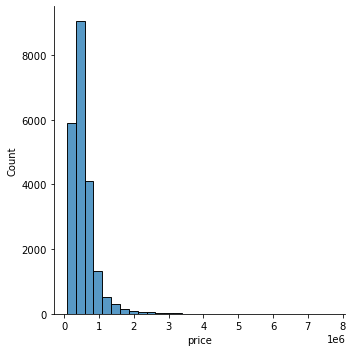

In [7]:
sns.displot(df['price'], bins=30);

We might want to consider removing those extremely expensive houses when we train our model.

Since it's really not that many houses  on the market that are that expensive.

It may not be useful to actually have our model train on those extreme outliers.

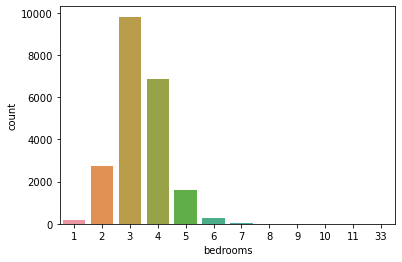

In [8]:
sns.countplot(data=df, x='bedrooms');

We can see that most of the houses have 2-3 bedrooms. However there are some houses with 33 bedrooms.

## Checking correlation

In [9]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

We can see `sqft_living` is highly correlated. So we will continue exploring those highly corrleated features using scatterplot.

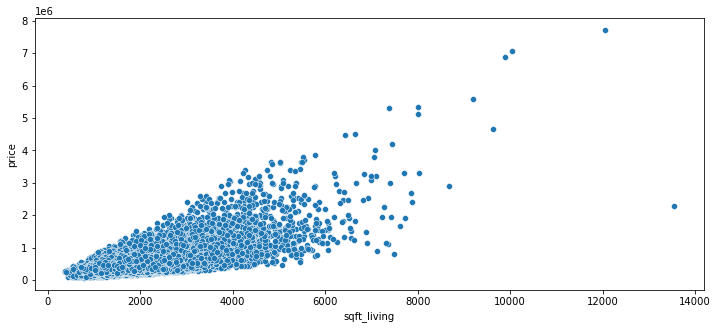

In [10]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='sqft_living', y='price');

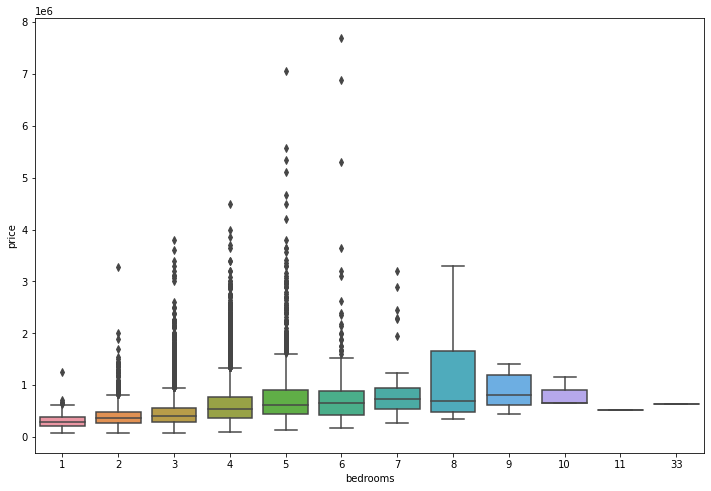

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms', y='price', data=df);

------

# Geographical Properties

let's check the distribution of prices per latitude and longtitude.

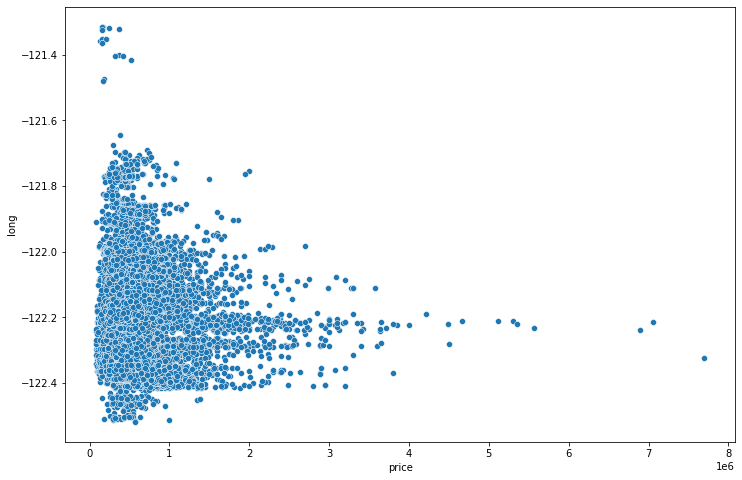

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='price', y='long');

We can see that longtitude `-122.2` around there, seem to be expensive houses.

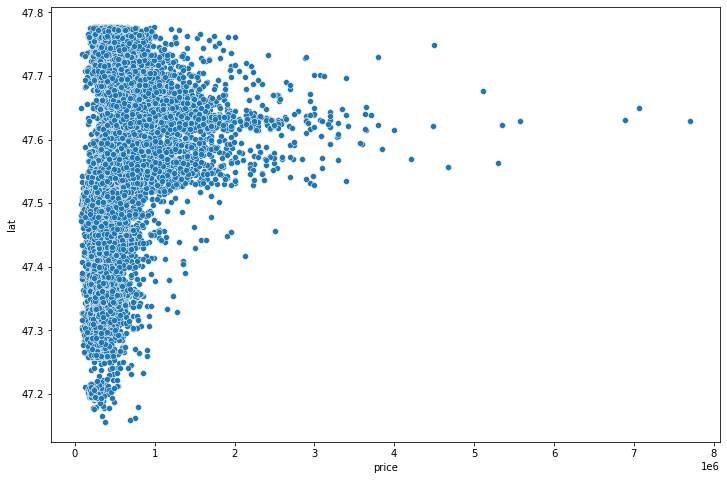

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='price', y='lat');

We can see that latitdue 47.6 and 47.6 around there, seem to be expensive housing area.


## let's plot out the king county area heat map

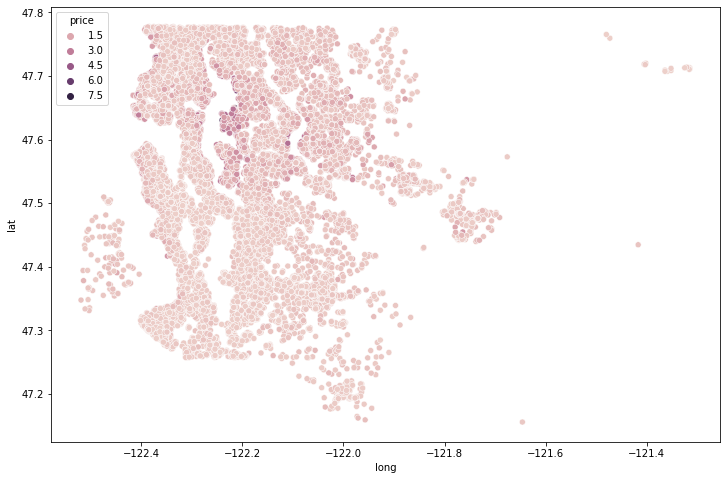

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='long', y='lat', hue='price');

We are not getting the color gradient as we would like. That's because of those expensive outliers.

So let's clean up those data a little bit more.

In [15]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


We can see most expensive house is 7.7 million dollars and prices get quickly drop off to 3 millions range.

So we will ignore top 1 percent of our housing dataset (outliers).

In this case till 216 houses indexes are top 1 percent.


In [16]:
len(df)*0.01

215.97

In [17]:
# we will grab all dataset start from 216 index (ignore the top one percent)

non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:]

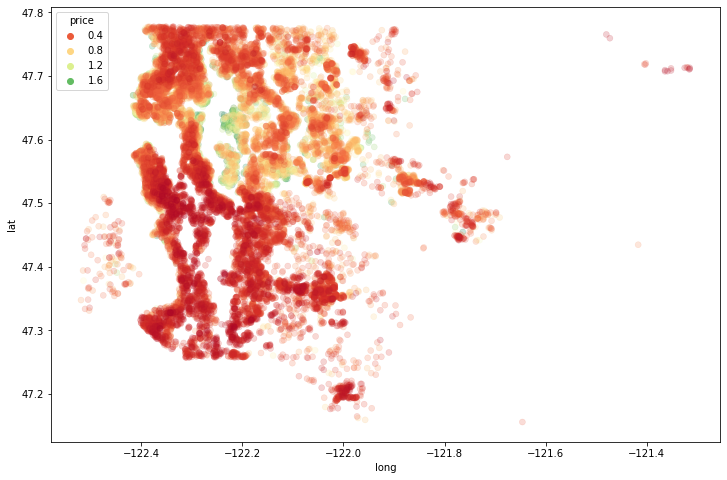

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=non_top_1_percent, x='long', y='lat', hue='price', 
                edgecolor=None, alpha=0.2, palette='RdYlGn');

We can see Green color around the water front areas, which makes sense because those types of houses are more expensive.

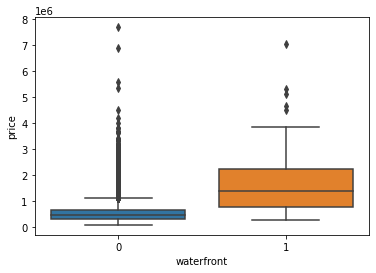

In [20]:
sns.boxplot(data=df, x='waterfront', y='price');

------

# Working with Feature Data (Feature Engineering)

###  As we know `id` column doesn't provide any value for our model prediction, we will drop it.

In [21]:
df = df.drop('id', axis=1)

-----

### for `date` object, currently it is in object. We want to convert to datetime.

In this way, we can manipulate date data.

In [22]:
df['date'].dtype

dtype('O')

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['date'].dtype

dtype('<M8[ns]')

In [25]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

#### Extracing date information

In [28]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [29]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


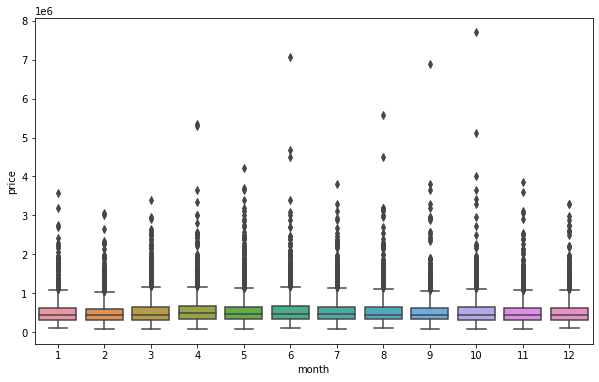

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='month', y='price');

#### check the mean price per month to see if there is any seasonality

In [35]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

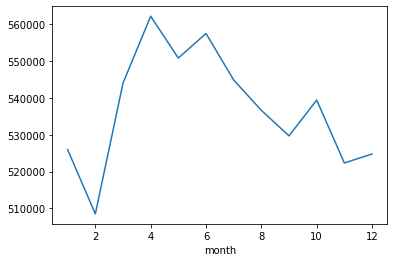

In [36]:
df.groupby('month').mean()['price'].plot();

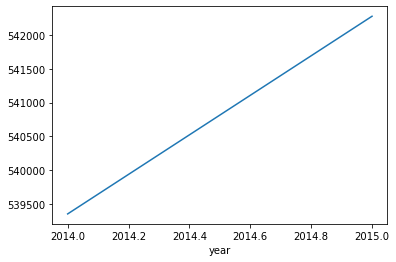

In [37]:
df.groupby('year').mean()['price'].plot();

In [38]:
# we will drop the original date column
df = df.drop('date', axis=1)
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


In [39]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

### Zip code

In [41]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

As zipcode is not necessarily to keep it as integer, we might want to treat it as categorical values. 

So if we look at the unique zip code, there are 70. 

If we convert this to dummy variables, we will get extra 70 categories. For this particular case, it is too much. So we decided to drop this column.

+ Alternatively, we can categorize them into `Expensive Zip Code` and `InExpensive Zip Code` using domain experiences.
+ Another way is to group them as `North`, `South`, `East`, `West` etc.

In [42]:
df = df.drop('zipcode', axis=1)

-------

### Year Renovated

In [43]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [44]:
df['yr_renovated'].dtype

dtype('int64')

Most of the data are `0` meaning `No Renovation data`. Other are like `2014` ones are 91. etc.

So we can categroize them as `Renovated` or `No Renovated` categories, rather than integer number. 

**However, we can also imagine that recently rennovated houses may tend to correlate with higher price than old houses.**

Therefor in this case, the more recent the year, the higher the price. We can leave the column as it is, as `year value (such as 2014)` are higher than`0 value: No Renovated` and it is aligned with `the more recent the year, the higher the price` .

In [45]:
df['yr_renovated'].apply(lambda year: 1 if year > 0 else 0)

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated, Length: 21597, dtype: int64

-----

### Square Feet Basement

This is the similar situation as `yr_renovated` column.

`0` means there is no basement. So it makes sense to keep it as continuous.

In [46]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

-----
-----

# Scaling and Train Test Split

Tensorflow will complain if we don't pass numeric array. It can't handle Pandas series or dataframe

In [47]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# Modelling

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Typically, we try to base the number of neurons in our layer as the size of actual features data.

We can see there are 19 features in our data.

In [55]:
X_train.shape

(15117, 19)

In [54]:
model = Sequential()

In [56]:
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Training the Model

### validation_data:
+ it is used for validation on each epoch. It will quickly runs the test data and check our loss on the test data. In this way, we can keep a tracking of how well we are performing, not just on the training data, but also on test data.
+ This test data won't affect the weights and bias of the network.

### batch_size: typical values is power of 2 (128, 256, 518, etc)
+ If the data is too large, we can pass data in batches.
+ **The smaller the batch size, the longer it takes to train**, the **less likely you are going to overfit** because you are passing in entire training data set at once.Instead you are focusing on these batches.

In [58]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 4ms/step - loss: 229543018496.0000 - val_loss: 146331058176.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 116483309568.0000 - val_loss: 96787046400.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 98907783168.0000 - val_loss: 94791008256.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 97172103168.0000 - val_loss: 93249208320.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 95561039872.0000 - val_loss: 91715117056.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 93952385024.0000 - val_loss: 90165633024.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 92288557056.0000 - val_loss: 88589385728.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 90553679872.0000 - val_loss: 86994165760.0000
Epoch 9/400
119/119 [========

119/119 [==============================] - 0s 2ms/step - loss: 37143764992.0000 - val_loss: 35888029696.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 37019635712.0000 - val_loss: 35640848384.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 36841455616.0000 - val_loss: 35496296448.0000
Epoch 71/400
119/119 [==============================] - 0s 4ms/step - loss: 36725272576.0000 - val_loss: 35403669504.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 36604850176.0000 - val_loss: 35203923968.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 36445102080.0000 - val_loss: 35104575488.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 36284715008.0000 - val_loss: 34992242688.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 36175876096.0000 - val_loss: 34821734400.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32927205376.0000 - val_loss: 31436474368.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 32884221952.0000 - val_loss: 31400146944.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32857337856.0000 - val_loss: 31481550848.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32876658688.0000 - val_loss: 31392770048.0000
Epoch 139/400
119/119 [==============================] - ETA: 0s - loss: 33052762112.000 - 0s 3ms/step - loss: 32809189376.0000 - val_loss: 31474696192.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32811233280.0000 - val_loss: 31305924608.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32750989312.0000 - val_loss: 31270260736.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32694337536.0000 - val_loss:

119/119 [==============================] - 0s 3ms/step - loss: 31522818048.0000 - val_loss: 29773228032.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31491139584.0000 - val_loss: 29757208576.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31480580096.0000 - val_loss: 29721593856.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31454117888.0000 - val_loss: 29952153600.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31464499200.0000 - val_loss: 29703583744.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31436132352.0000 - val_loss: 29684934656.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31440910336.0000 - val_loss: 29639147520.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31412512768.0000 - val_loss: 29759019008.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30729885696.0000 - val_loss: 28836536320.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30782492672.0000 - val_loss: 28805128192.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30709526528.0000 - val_loss: 28771069952.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30689404928.0000 - val_loss: 28782772224.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30690899968.0000 - val_loss: 28739917824.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30718492672.0000 - val_loss: 28849072128.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30672211968.0000 - val_loss: 28704499712.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30675503104.0000 - val_loss: 28743366656.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30184544256.0000 - val_loss: 28077481984.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30172989440.0000 - val_loss: 28056059904.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30178611200.0000 - val_loss: 28098492416.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30165846016.0000 - val_loss: 28166889472.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30162659328.0000 - val_loss: 28036136960.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30165995520.0000 - val_loss: 28016523264.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30125072384.0000 - val_loss: 28137148416.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 30128506880.0000 - val_loss: 27981101056.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29691420672.0000 - val_loss: 27426426880.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29652121600.0000 - val_loss: 27414693888.0000


### Explore the history of losses

There are two columns `loss` and `val_loss`.
+ loss on training data
+ loss on validation data

In [61]:
df_losses = pd.DataFrame(model.history.history)
df_losses.head()

,loss,val_loss
0,2.295430e+11,1.463311e+11
1,1.164833e+11,9.678705e+10
2,9.890778e+10,9.479101e+10
3,9.717210e+10,9.324921e+10
4,9.556104e+10,9.171512e+10


This is a good sign. We normally want both loss and val_loss to be decreasing.

**Always take note of spikes in val_loss which indicates the overfitting of training data.**

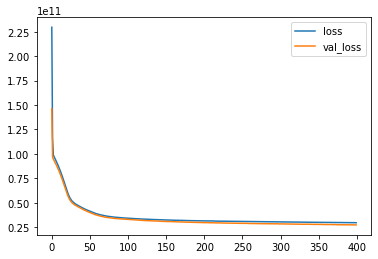

In [63]:
df_losses.plot();

# Evaluation on Test Data


https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [65]:
predictions = model.predict(X_test)

In [67]:
mean_absolute_error(y_test, predictions)

102180.57235906154

In [66]:
mean_squared_error(y_test, predictions)

27414690649.53842

In [68]:
np.sqrt(mean_squared_error(y_test, predictions))

165573.8223558858

### Check the mean price of original dataset

In [74]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [75]:
5.402966e+05

540296.6

Average price of house is around 54000\$. 

And our MAE is 102180\$ which is about 19%. This is not great and not horrible either too.

In [76]:
100* 102180 /5.402966e+05

18.911834721891644

## explained_variance_score
+ tells you how much variance is being explained by your actual model.
+ `Best possible score is 1.0, lower values are worse.`

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html

https://www.statisticshowto.com/explained-variance-variation/


In [77]:
explained_variance_score(y_test, predictions)

0.7933498991361747

Is it good or bad? 

This is based on context. If we have a previously trained model, we might want to compare this value.

### Visualization of predictions vs true value

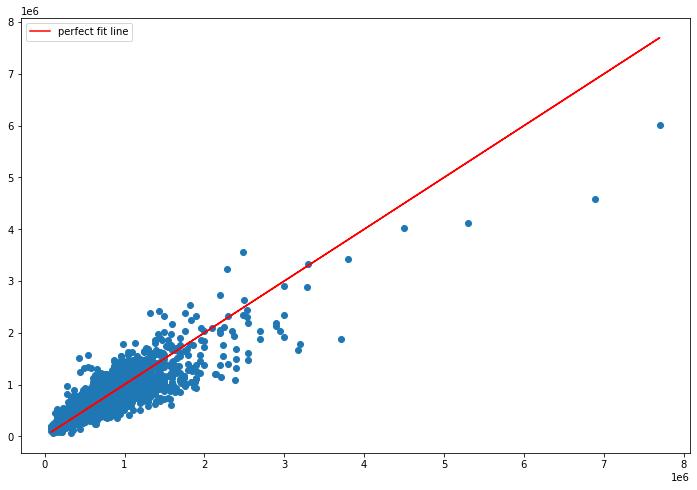

In [83]:
plt.figure(figsize=(12,8))

# Our predictions
plt.scatter(y_test, predictions);

# Perfect predictions
plt.plot(y_test, y_test, color='r', label='perfect fit line')
plt.legend();

In [84]:
predictions.shape

(6480, 1)

### Plot the error

In [90]:
errors = y_test.reshape(6480, 1) - predictions

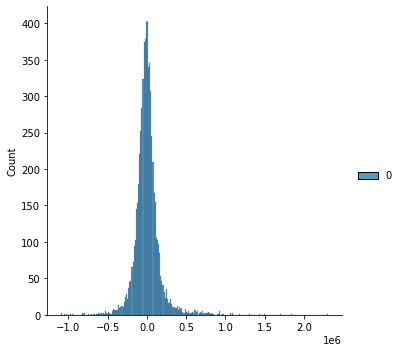

In [92]:
sns.displot(errors);

-------

# Predicting on Brand New Data

In [93]:
single_house = df.drop('price',axis=1).iloc[0]

In [96]:
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [97]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [98]:
model.predict(single_house)

array([[283173.8]], dtype=float32)

In [100]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64

Our model preidcts 283173 and actual price is 221900.

We are kinda overshooting. What we can do is drop off 1 or 2% of top value and re-train the model, see if it can reduce MSE on our dataset.